In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_customers_dataset.csv")
geolocation_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_geolocation_dataset.csv")
items_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_order_items_dataset.csv")
payments_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_order_payments_dataset.csv")
reviews_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_orders_dataset.csv")
products_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_products_dataset.csv")
sellers_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_sellers_dataset.csv")
category_product_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\product_category_name_translation.csv")

df_list =[customer_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_product_df]
keys = str.split("customer_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_product_df",sep = ', ')
df_dict = dict(zip(keys, df_list))


In [3]:
#each dataset information and structure
for k,v in df_dict.items():
    print(f"{k}:-")
    print(v.info())
    print('*-'*76)

customer_df:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
geolocation_df:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 n

In [4]:
#null values
for k,v in df_dict.items():
    print(f"{k}:-")
    print(v.isnull().sum())
    print('*-'*76)

customer_df:-
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
geolocation_df:-
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
items_df:-
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

*Examining Null values

In [5]:
reviews_df[reviews_df.isnull().any(axis = 1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
orders_df[orders_df.isnull().any(axis = 1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [7]:
products_df[products_df.isnull().any(axis = 1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [12]:
missing_value_products_df_percentage =  (products_df.isnull().sum()/len(products_df)) * 100
missing_value_reviews_df_percentage = (reviews_df.isnull().sum()/len(reviews_df)) * 100
missing_value_orders_df_percentage = (orders_df.isnull().sum()/len(orders_df)) * 100

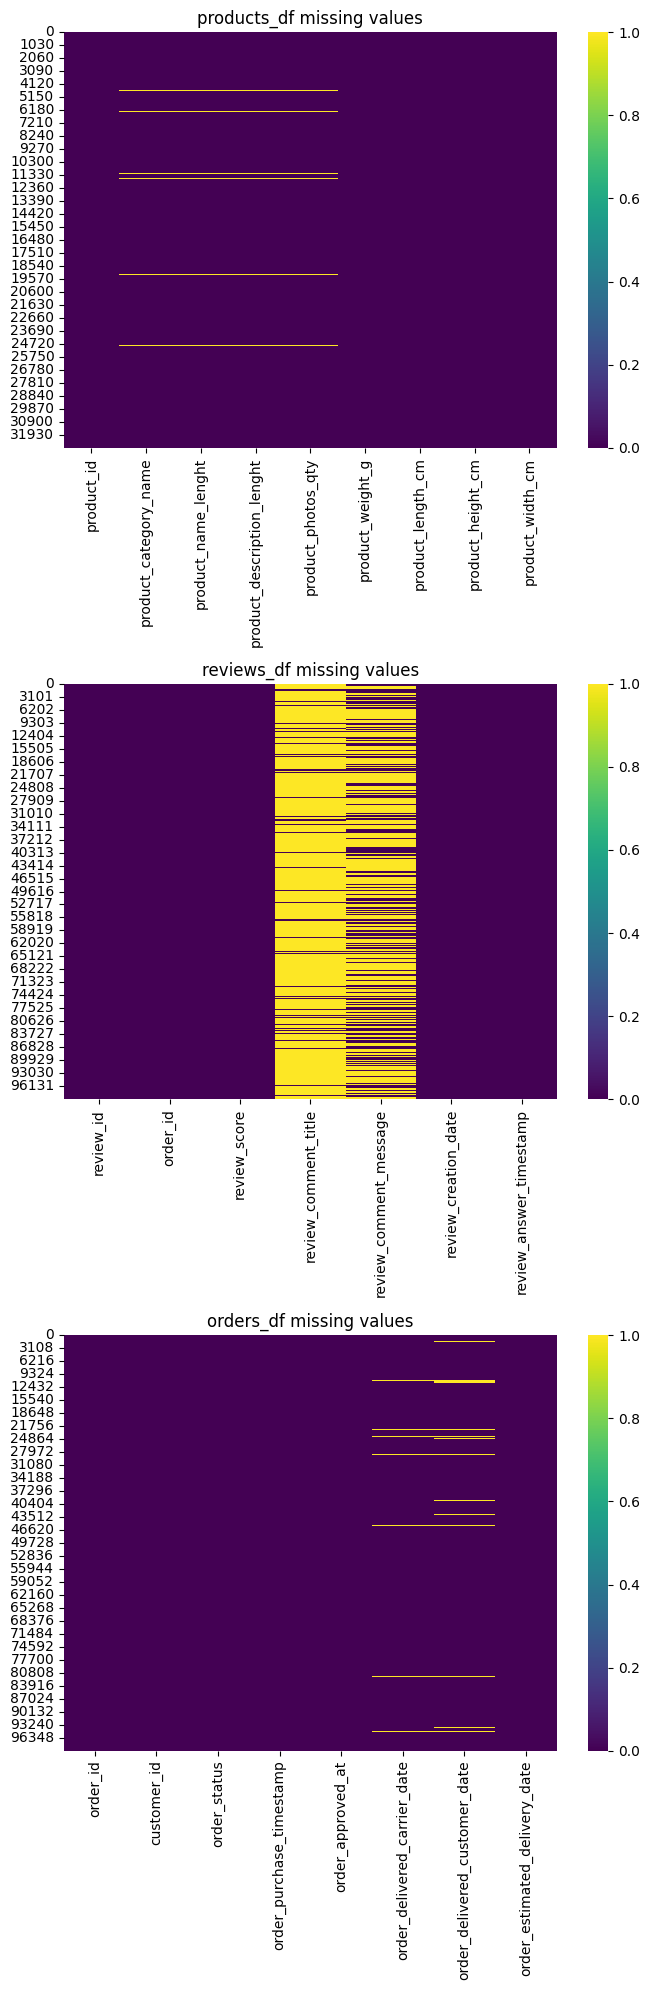

In [13]:
fig, axes = plt.subplots(3,1,figsize = (7,20))

sns.heatmap(products_df.isnull(),ax= axes[0], cmap = 'viridis')
axes[0].set_title("products_df missing values")
sns.heatmap(reviews_df.isnull(),ax= axes[1], cmap = 'viridis')
axes[1].set_title("reviews_df missing values")
sns.heatmap(orders_df.isnull(),ax= axes[2], cmap = 'viridis')
axes[2].set_title("orders_df missing values")
plt.tight_layout()
#plt.savefig("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\null_values_heatmap.png", dpi = 300)
plt.show()


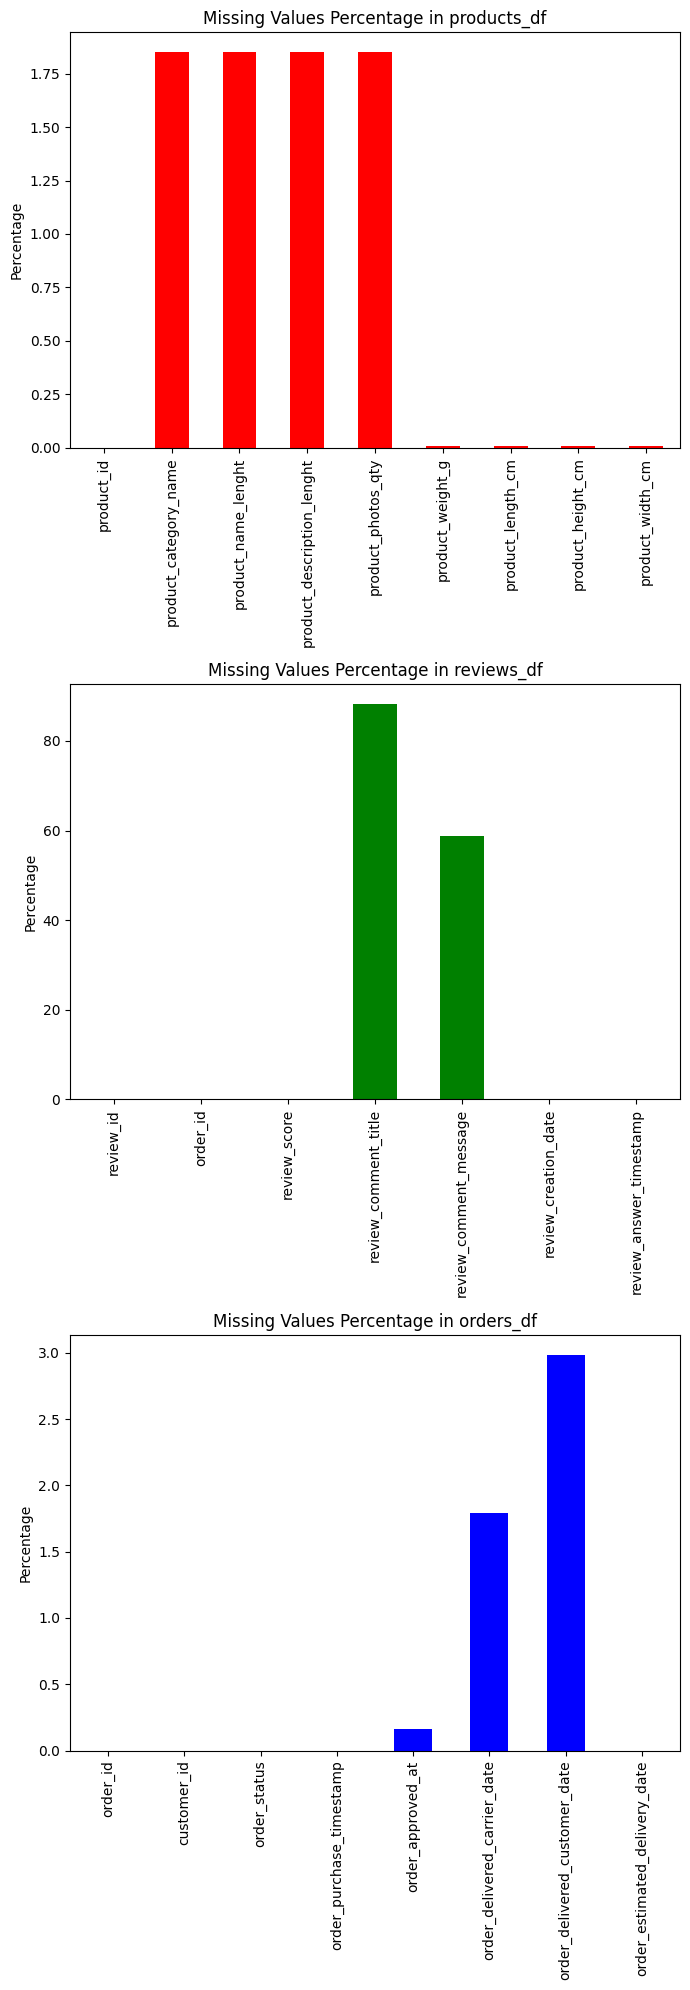

In [14]:
fig,axes = plt.subplots(3,1,figsize = (7,20))
missing_value_products_df_percentage.plot(ax=axes[0],kind = 'bar', color = 'red')
axes[0].set_title("Missing Values Percentage in products_df")
axes[0].set_ylabel("Percentage")

missing_value_reviews_df_percentage.plot(ax=axes[1],kind = 'bar', color = 'green')
axes[1].set_title("Missing Values Percentage in reviews_df")
axes[1].set_ylabel("Percentage")

missing_value_orders_df_percentage.plot(ax=axes[2],kind = 'bar', color = 'blue')
axes[2].set_title("Missing Values Percentage in orders_df")
axes[2].set_ylabel("Percentage")

plt.tight_layout()
#plt.savefig("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\null_values_bar_plot.png", dpi = 300)
plt.show()

In [15]:
products_df = products_df.dropna().drop_duplicates()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [16]:
orders_df = orders_df.dropna().drop_duplicates()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [32]:
# Convert date columns in orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Verify the conversion
print(orders_df.dtypes)


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [33]:
invalid_dates = orders_df[orders_df['order_purchase_timestamp'].isna()]
print(invalid_dates)

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [34]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])
print(items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


### Dataset Insights

### 1. Zip Code Prefix (Customer and Geolocation Data)
- Both `customer_df` and `geolocation_df` contain `zip_code_prefix` values that can be used to analyze **regional trends** and segment customers by location.
- The wide range of zip codes in these datasets indicates a broad geographic distribution of customers and locations, with `min` and `max` zip code prefixes ranging from **1003** to **99990**.
- Future analysis could involve categorizing zip codes into larger regions or clusters to explore geographical patterns in customer behavior or shipping times.

### 2. Order Details (items_df, orders_df)
- The `items_df` includes features like `shipping_limit_date`, `price`, and `freight_value`, which are crucial for understanding **order values** and **shipping costs**.
  - Example: **price** ranges from **0.85** to **6735.00**, while **freight_value** ranges from **0.00** to **409.68**.
- The `orders_df` contains important **timestamps** for order processing (purchase, approval, delivery) that will help in calculating **time-to-deliver**, **processing time**, and potential delays.
  - Ensure that the date and time fields (currently in `object` format) are converted to `datetime` for accurate time-based analysis.

### 3. Payment Details (payments_df)
- The `payments_df` provides insights into customer **payment behavior**, such as the number of installments and payment values.
  - **Payment value** ranges from **0.00** to **13,664.08**, with an average of **154.10**, suggesting a wide variance in customer spending patterns.
- Cross-referencing `payment_value` with order information can provide deeper insights into how customers finance their purchases, especially in relation to order amounts.

### 4. Review Data (reviews_df)
- The `review_score` data indicates generally positive customer satisfaction, with a mean score of **4.08** and most reviews clustered around the 4-5 range.
- This dataset could be useful for **customer satisfaction analysis**, where customers can be segmented based on their feedback scores. It may also be useful for identifying potential customer dissatisfaction (low scores).

### 5. Product Details (products_df)
- The `products_df` dataset provides detailed information on product characteristics, such as **weight**, **dimensions**, and the number of **photos** available for each product.
  - There is a wide variation in product weights (ranging from **0.00** to **40,425.00 grams**) and dimensions, which could impact **shipping costs** or **logistics** decisions.
- This dataset can be useful for clustering products by their physical characteristics to analyze how size or weight influences other aspects like shipping costs or customer reviews.

### 6. Sellers Data (sellers_df)
- The `sellers_df` contains information on the **zip code prefixes** of sellers, which can be used to analyze **seller distribution** across regions.
- Understanding seller locations in relation to customer locations could help identify regional patterns in shipping times or performance metrics for sellers in different areas.

### 7. Category and Product Translation (category_product_df)
- This dataset provides a mapping of product categories to their English names, which will be helpful for interpreting and labeling product data in the analysis.
- Merging this dataset with `products_df` will allow for easier understanding and analysis of product categories during further exploration and segmentation.

In [35]:
del df_dict['reviews_df']
for key,value in df_dict.items():
    print(f"{key}:-")
    display(value.describe())
    print("*-"*76)

KeyError: 'reviews_df'

In [36]:
for data in df_dict:
    print(f"{data}:- ")
    display(df_dict[data].info())

customer_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

geolocation_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

items_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


None

payments_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

orders_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

products_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

sellers_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

category_product_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

### Distribution and Outliers

### 1. **Product Width (cm)**
- **Summary Statistics:**
  - Mean: 27.6 cm
  - Median: 26 cm
  - Standard Deviation: 8.2 cm
  - Min: 5 cm
  - Max: 120 cm
- **Insights:**
  - **Distribution:** Right-skewed, with most products having a width between 10 cm and 30 cm.
  - **Outliers:** Several outliers above 50 cm, with the maximum being 120 cm.

### 2. **Product Height (cm)**
- **Summary Statistics:**
  - Mean: 16.6 cm
  - Median: 14 cm
  - Standard Deviation: 10.3 cm
  - Min: 2 cm
  - Max: 105 cm
- **Insights:**
  - **Distribution:** Skewed towards shorter heights, with the majority below 30 cm.
  - **Outliers:** Some notable outliers above 40 cm, peaking at 105 cm.

### 3. **Product Length (cm)**
- **Summary Statistics:**
  - Mean: 34.5 cm
  - Median: 30 cm
  - Standard Deviation: 14.1 cm
  - Min: 7 cm
  - Max: 105 cm
- **Insights:**
  - **Distribution:** Most products are between 10 cm and 50 cm.
  - **Outliers:** Values above 60 cm are outliers, with a few reaching 105 cm.

### 4. **Product Weight (g)**
- **Summary Statistics:**
  - Mean: 2141.9 g
  - Median: 1300 g
  - Standard Deviation: 3000.4 g
  - Min: 0 g
  - Max: 40000 g
- **Insights:**
  - **Distribution:** Heavily concentrated around lower weights, with the median much lower than the mean due to right-skewness.
  - **Outliers:** Many outliers above 5000 g, with a maximum of 40,000 g.

### 5. **Product Photos Quantity**
- **Summary Statistics:**
  - Mean: 1.8 photos
  - Median: 2 photos
  - Standard Deviation: 1.0 photos
  - Min: 0 photos
  - Max: 20 photos
- **Insights:**
  - **Distribution:** Most products have 2-3 photos.
  - **Outliers:** Some outliers with as many as 10-20 photos.

### 6. **Product Description Length**
- **Summary Statistics:**
  - Mean: 762.5 characters
  - Median: 649 characters
  - Standard Deviation: 417.3 characters
  - Min: 0 characters
  - Max: 4000 characters
- **Insights:**
  - **Distribution:** Most descriptions are between 500-1500 characters long.
  - **Outliers:** Significant outliers above 2000 characters, with the longest description at 4000 characters.

### 7. **Product Name Length**
- **Summary Statistics:**
  - Mean: 49.7 characters
  - Median: 50 characters
  - Standard Deviation: 10.5 characters
  - Min: 2 characters
  - Max: 70 characters
- **Insights:**
  - **Distribution:** Names are fairly uniformly distributed around the median of 50 characters.
  - **Outliers:** A few outliers exist on the shorter end below 20 characters.

### 8. **Seller Zip Code Prefix**
- **Summary Statistics:**
  - Min: 0
  - Max: 99999
  - Mean: 29990
  - Median: 22220
- **Insights:** 
  - No significant outliers, with sellers spread out across multiple zip codes.

### 9. **Payment Value**
- **Summary Statistics:**
  - Mean: 154.6
  - Median: 80
  - Standard Deviation: 236.9
  - Min: 0
  - Max: 14,000
- **Insights:**
  - **Distribution:** Skewed heavily towards lower payment values, with most values below 1000.
  - **Outliers:** Numerous outliers exist, with a maximum value of 14,000.

### 10. **Payment Installments**
- **Summary Statistics:**
  - Mean: 2.9 installments
  - Median: 1 installment
  - Standard Deviation: 2.4 installments
  - Min: 1 installment
  - Max: 24 installments
- **Insights:**
  - **Distribution:** Most payments are made in fewer than 5 installments.
  - **Outliers:** Several instances of high installment numbers, peaking at 24.

### 11. **Payment Sequential**
- **Summary Statistics:**
  - Min: 1
  - Max: 30
  - Mean: 1.2
  - Median: 1
- **Insights:**
  - **Distribution:** Payments are sequential, but no significant skewness or outliers are observed.

### 12. **Freight Value**
- **Summary Statistics:**
  - Mean: 19.7
  - Median: 15.1
  - Standard Deviation: 15.5
  - Min: 0
  - Max: 400
- **Insights:**
  - **Distribution:** Most freight values are low, with values below 100.
  - **Outliers:** Several values spike beyond 100, with the maximum being 400.

### 13. **Geolocation Longitude and Latitude**
- **Summary Statistics (Longitude):**
  - Min: -106
  - Max: 106
  - Median: -50
- **Summary Statistics (Latitude):**
  - Min: -34
  - Max: 34
  - Median: -22
- **Insights:**
  - Both longitude and latitude are well-distributed around their respective medians.
  - Some outliers indicate possible errors or distant locations.

### 14. **Customer Zip Code Prefix**
- **Summary Statistics:**
  - Min: 0
  - Max: 99999
  - Mean: 29500
  - Median: 23000
- **Insights:**
  - The customer zip codes are widely spread across regions with no significant outliers.

### 15. **Review Scores**
- **Summary Statistics:**
  - Mean: 4.1
  - Median: 5.0
  - Standard Deviation: 1.1
  - Min: 1
  - Max: 5
- **Insights:**
  - **Distribution:** Most reviews are concentrated between 4.0 and 5.0, reflecting positive feedback.
  - **Outliers:** A few scores fall below 3.0, indicating negative reviews for some products.


In [37]:

def plot_numerical_histograms(df):
    # Select integer features
    integer_features = df.select_dtypes(include=(['int64','float64']))
    
    # Loop through each integer feature and plot a histogram
    for column in integer_features.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Histogram')
        plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{column}_histogram.png", dpi = 300)
        plt.show()




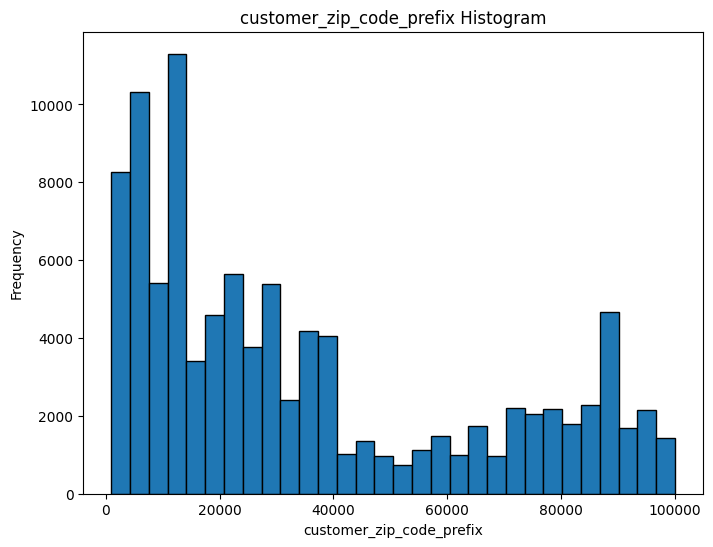

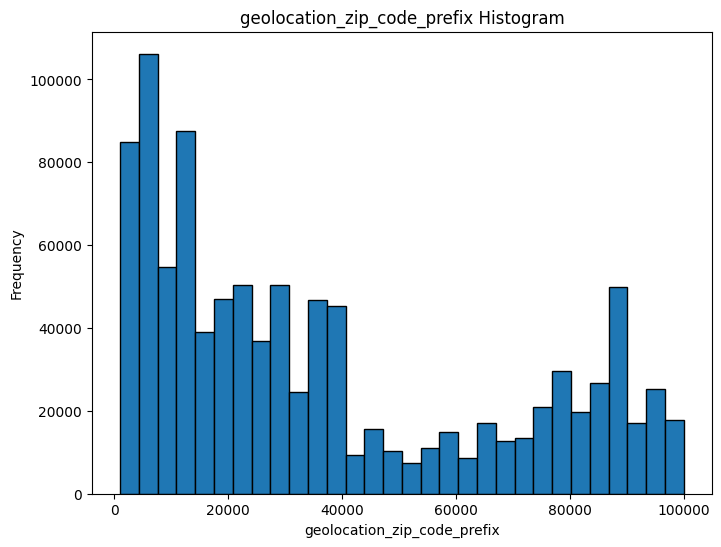

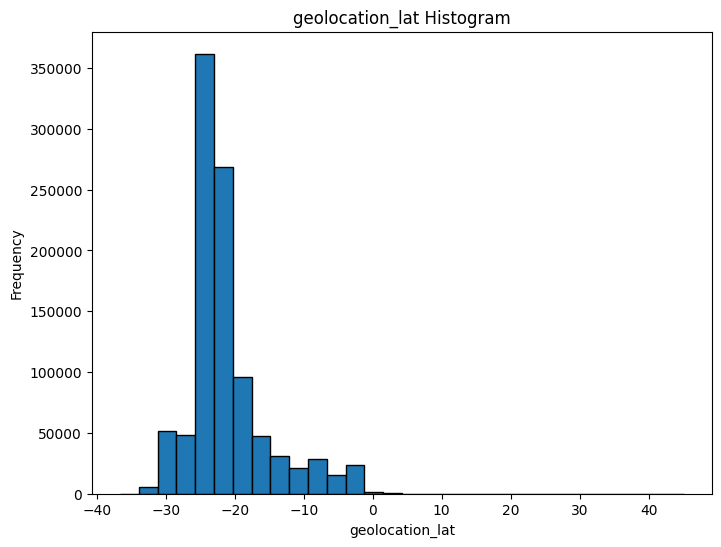

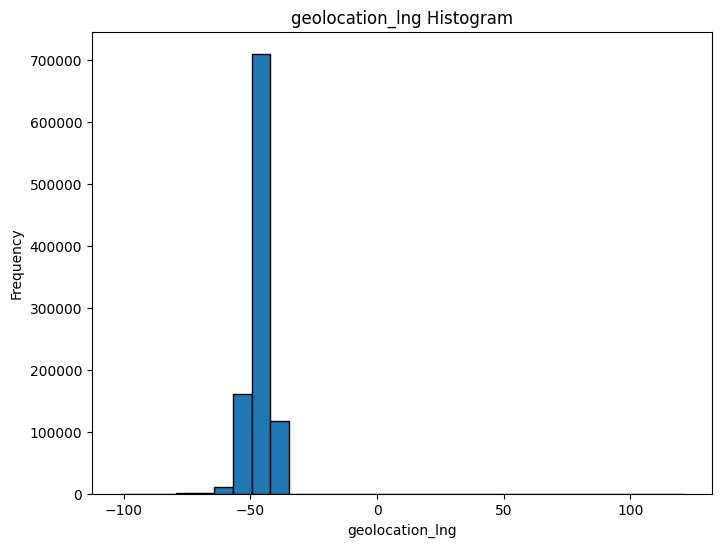

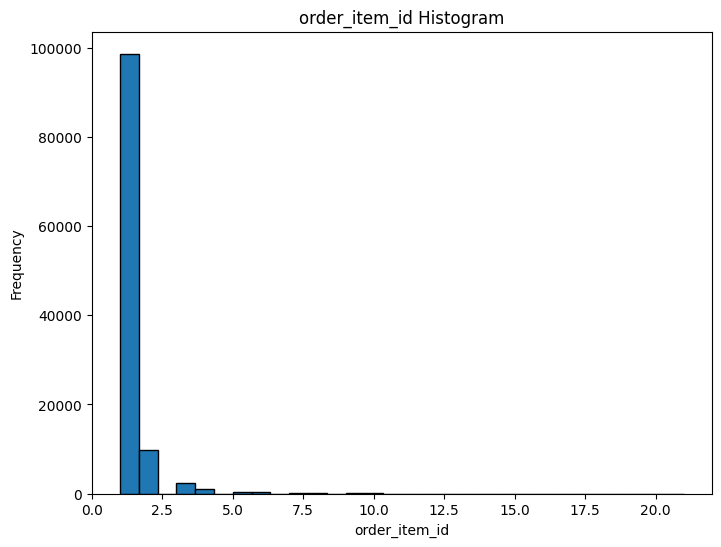

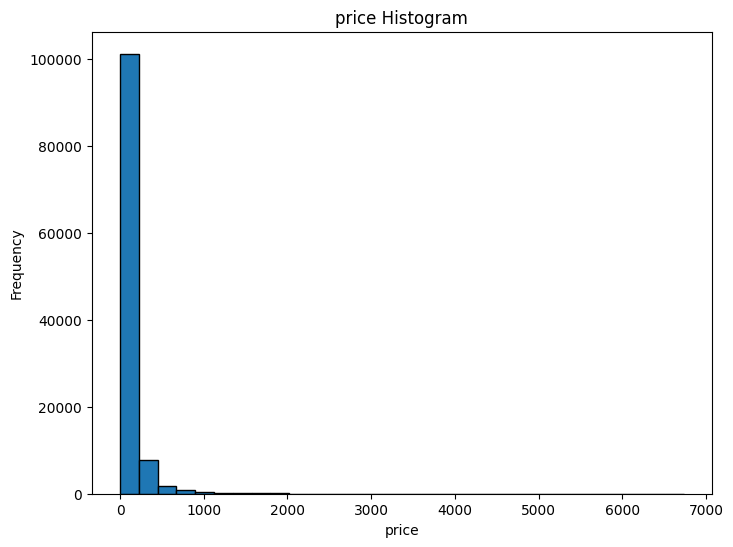

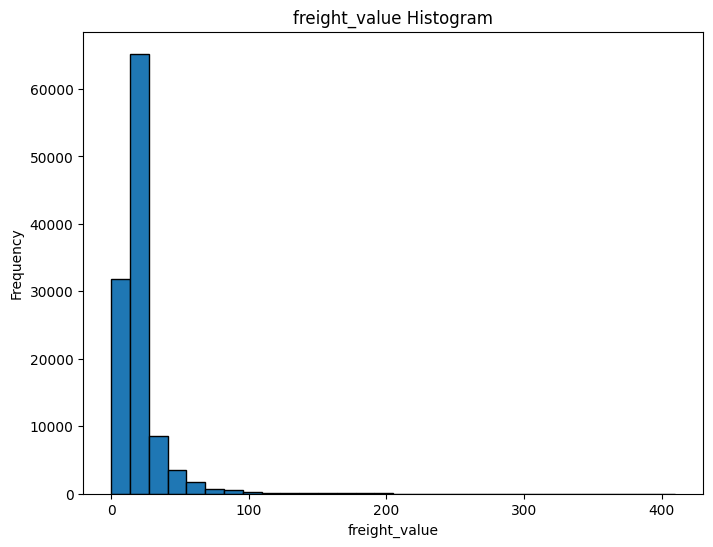

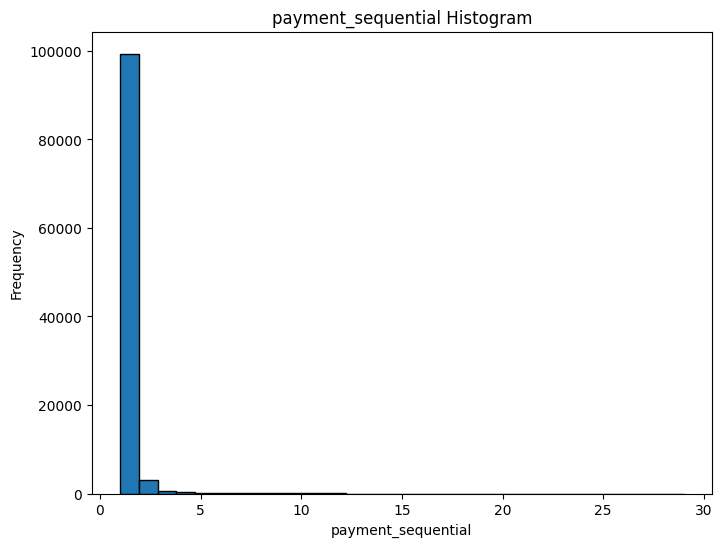

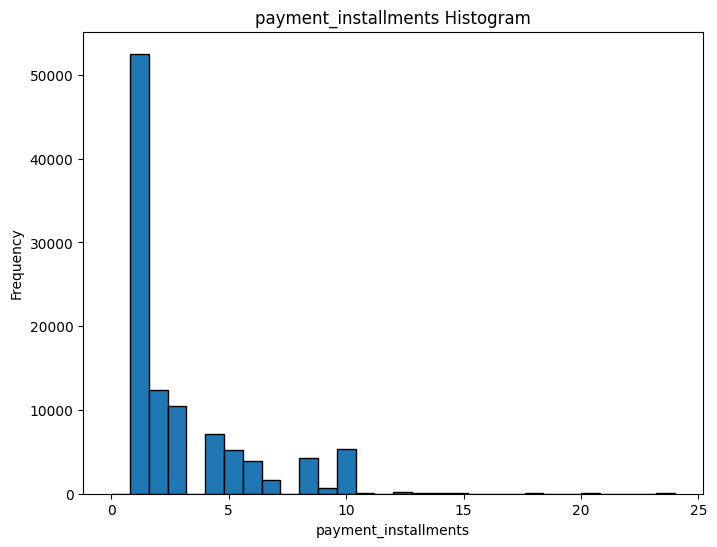

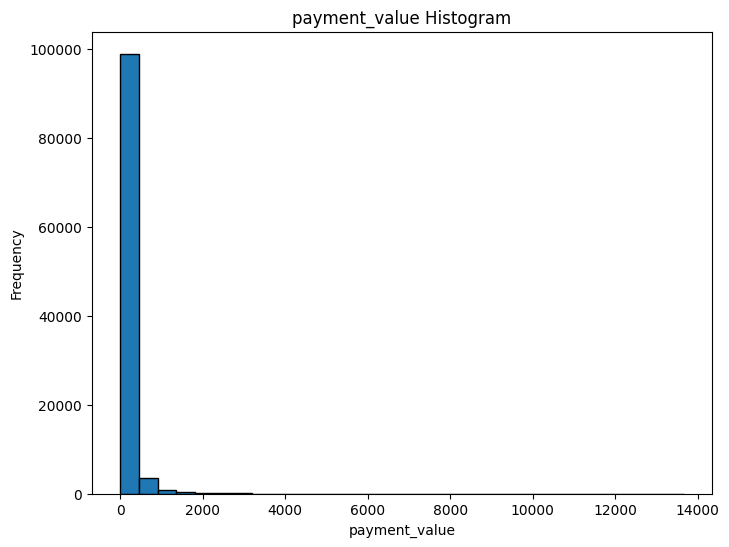

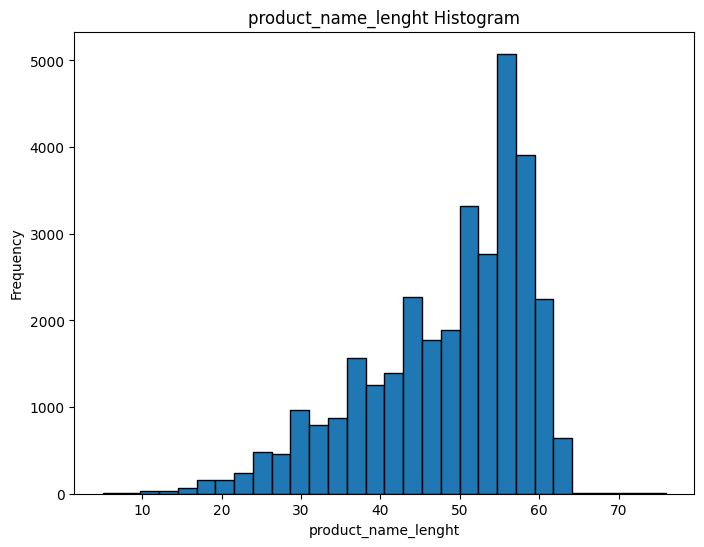

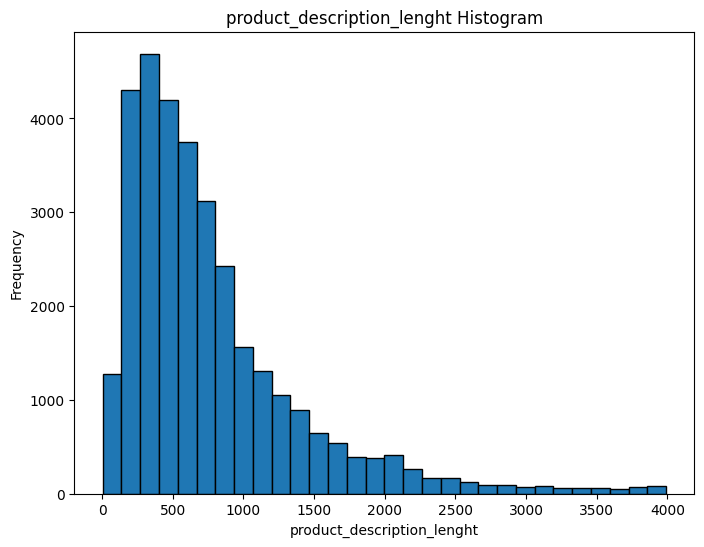

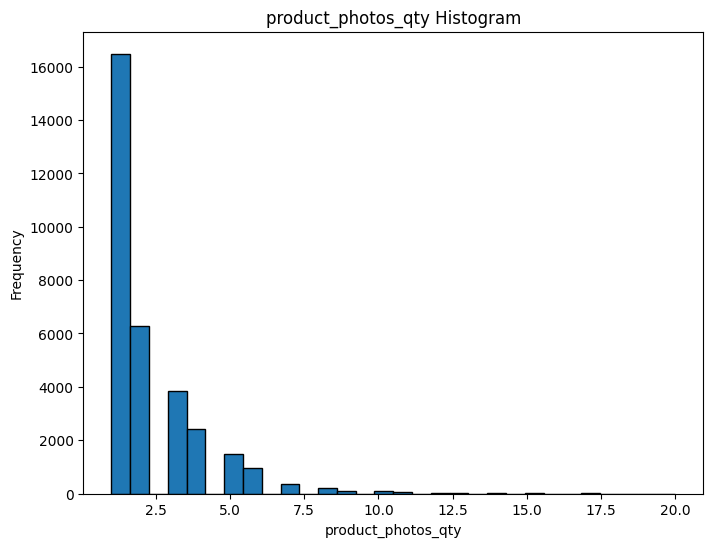

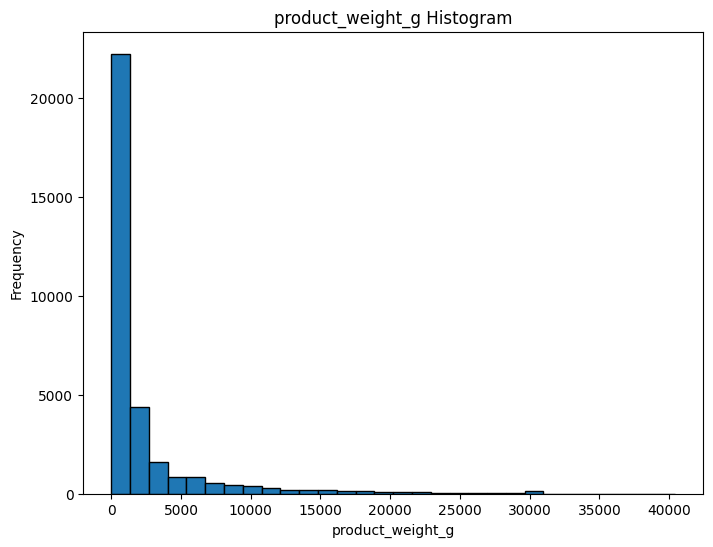

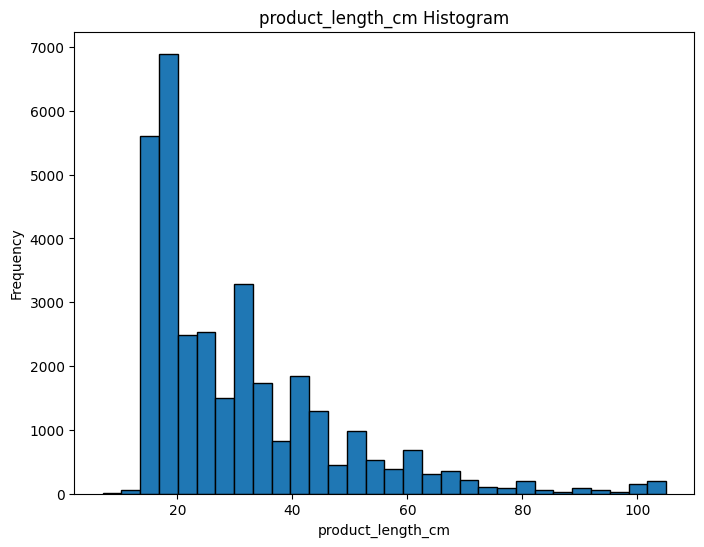

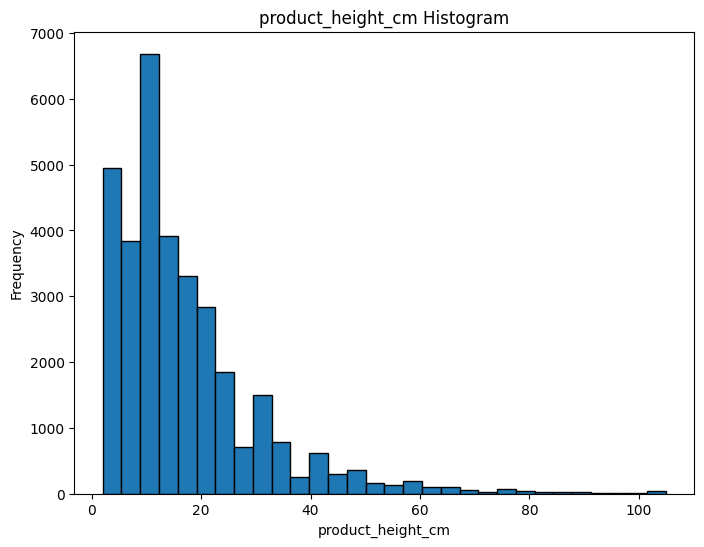

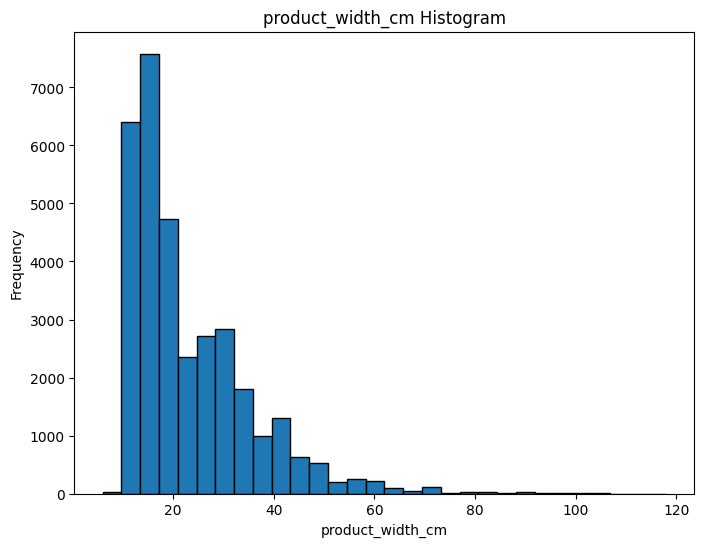

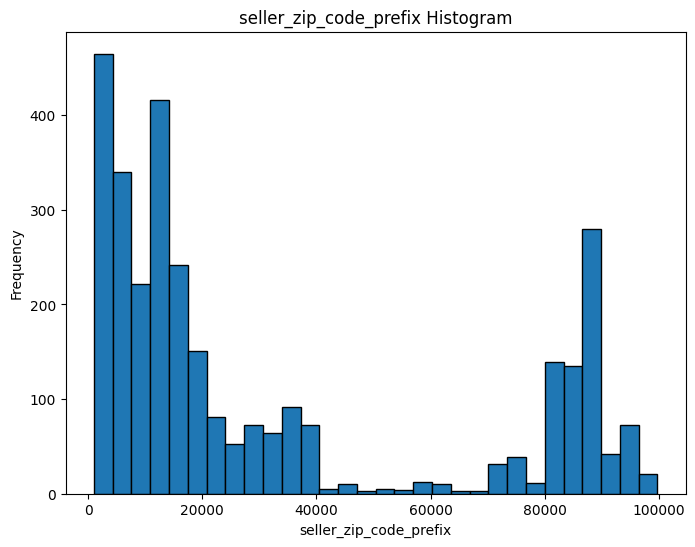

In [38]:
for key,df in df_dict.items():
    plot_numerical_histograms(df)

In [39]:
def plot_numerical_boxplots(df):
    # Select numerical features (both int and float types)
    numerical_features = df.select_dtypes(include=['int64', 'float64'])
    
    # Loop through each numerical feature and plot a box plot
    for column in numerical_features.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'{column} Box Plot')
        plt.xlabel(column)
        plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{column}_boxplot.png", dpi = 300)
        plt.show()


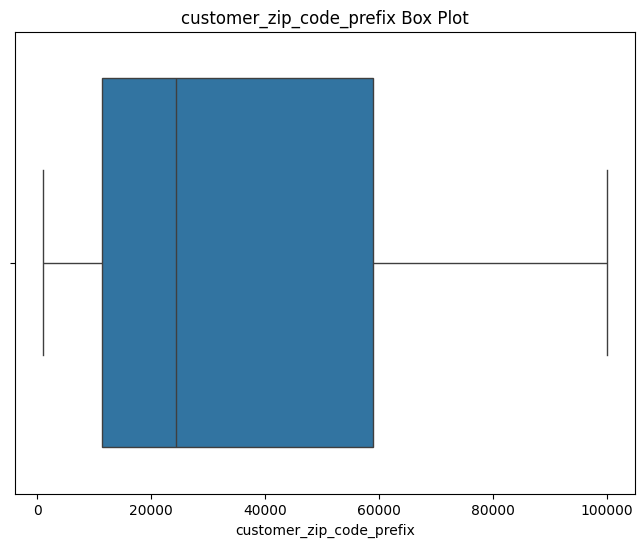

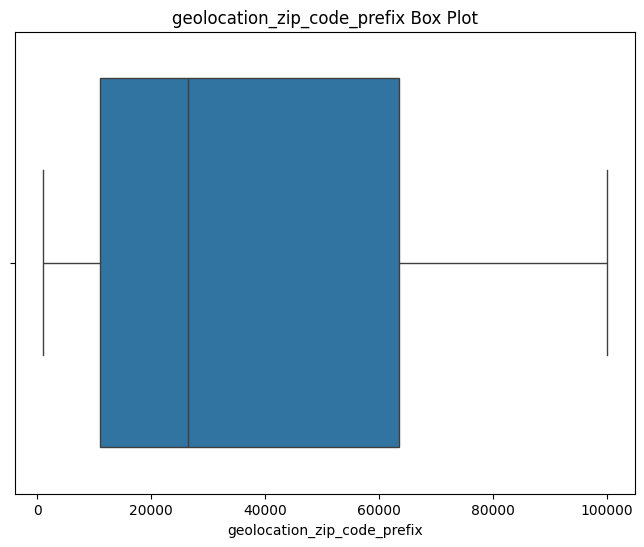

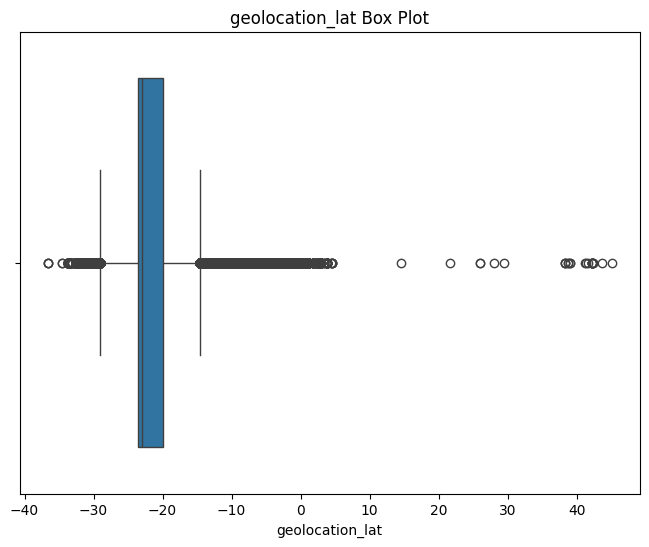

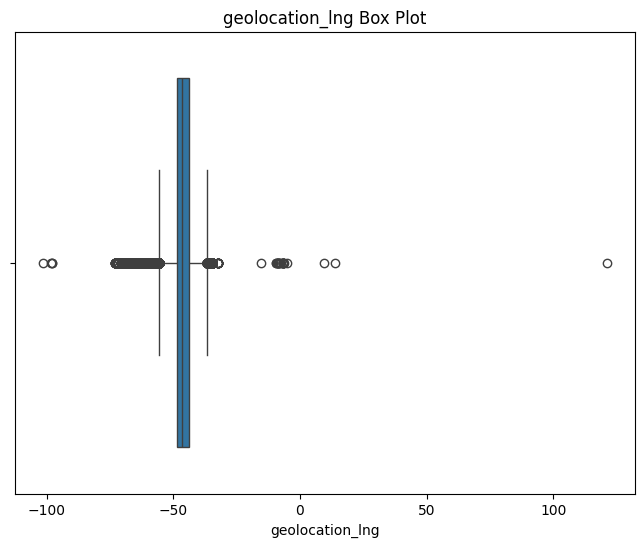

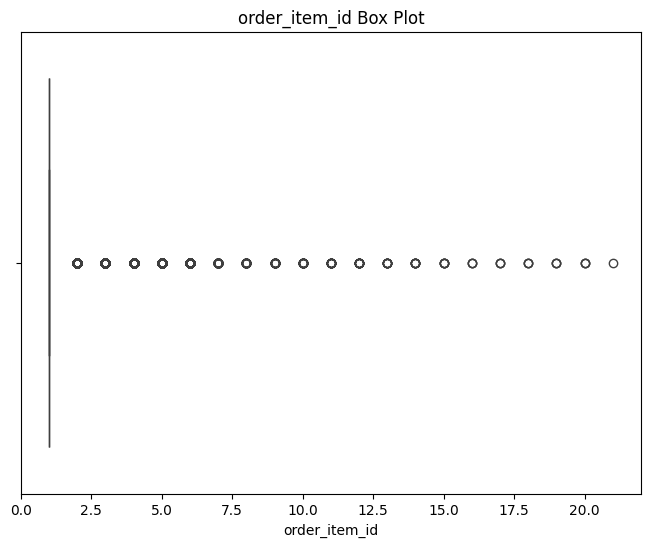

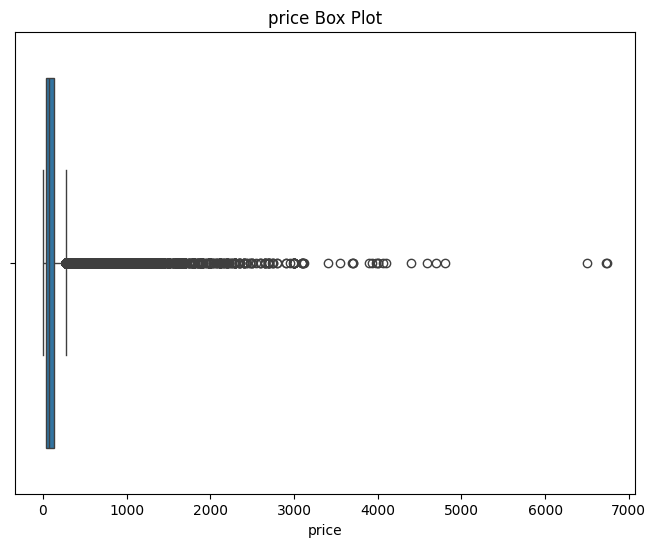

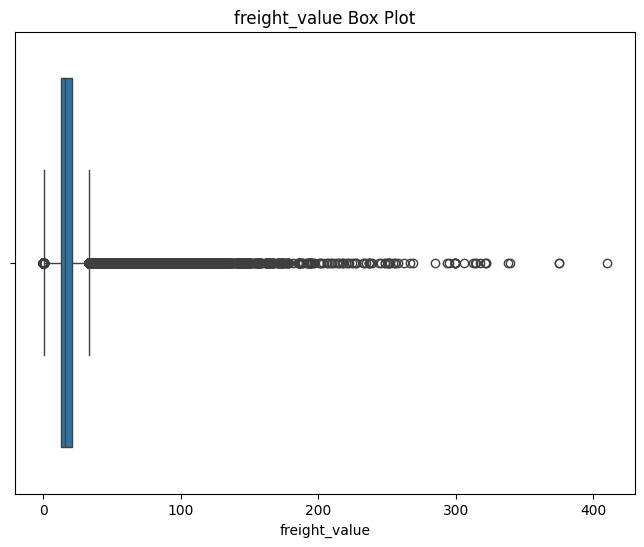

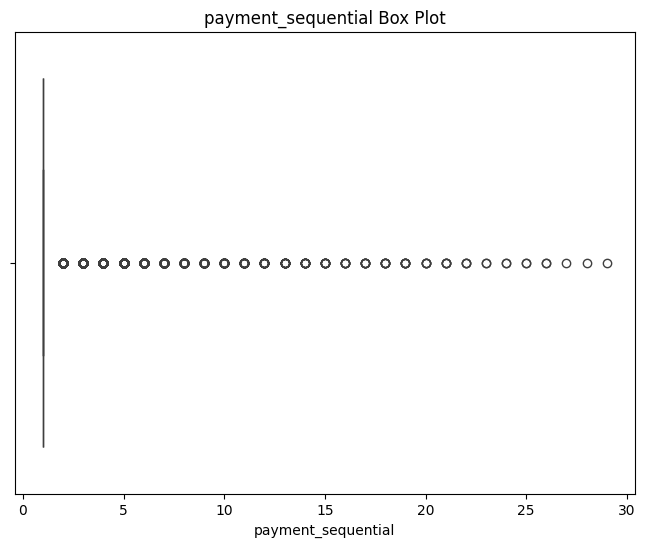

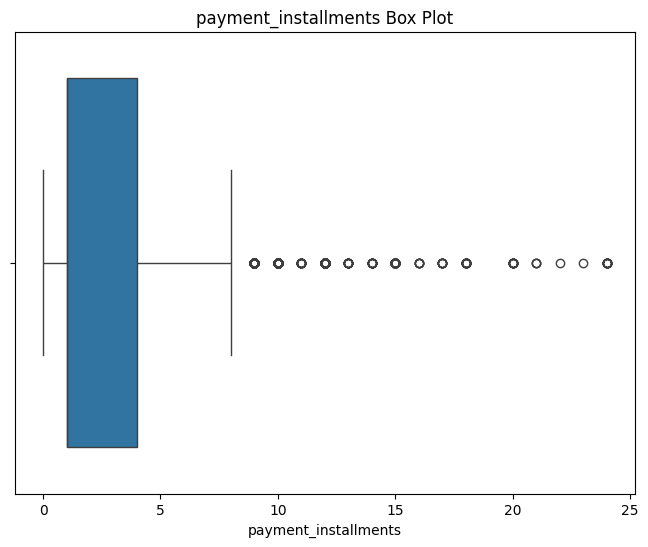

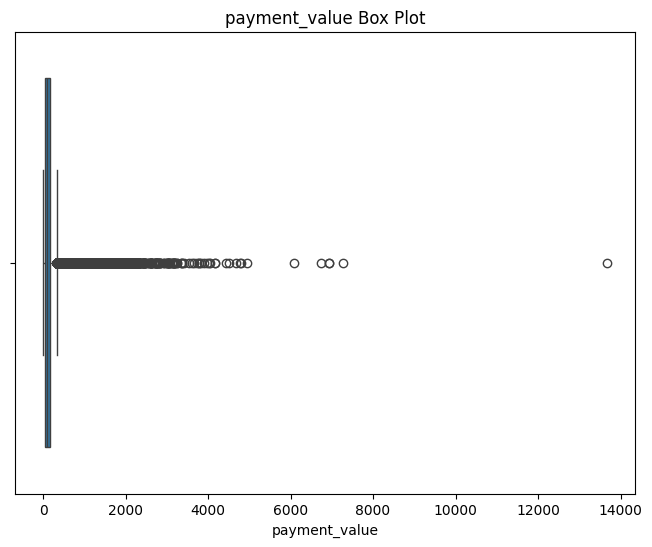

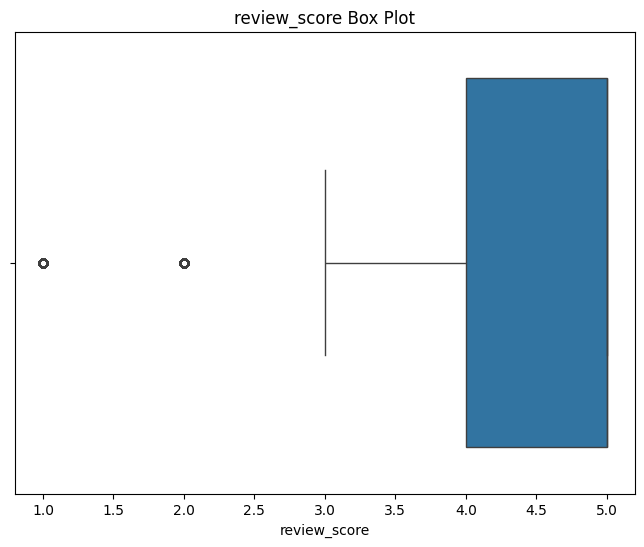

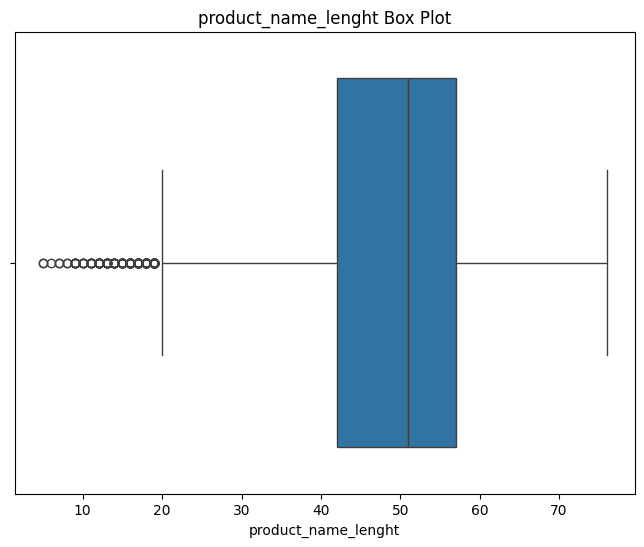

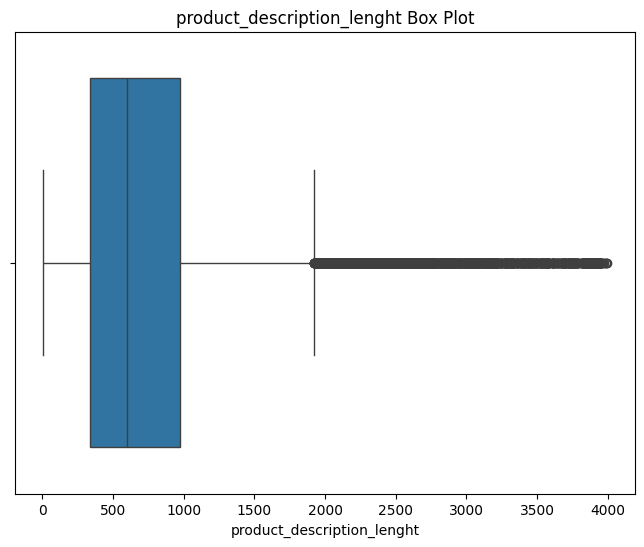

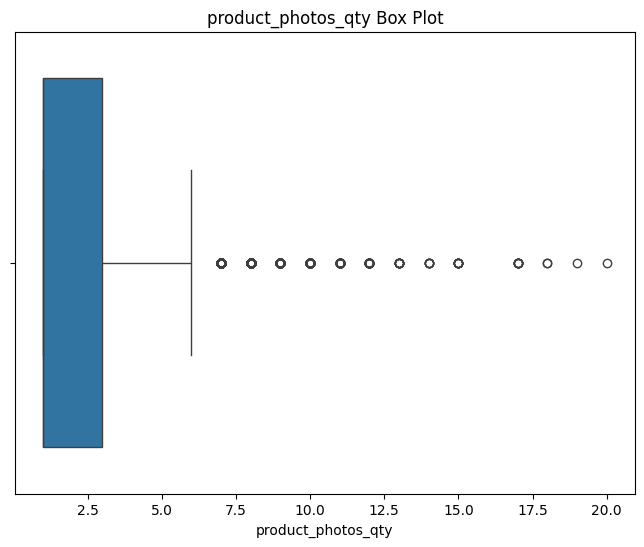

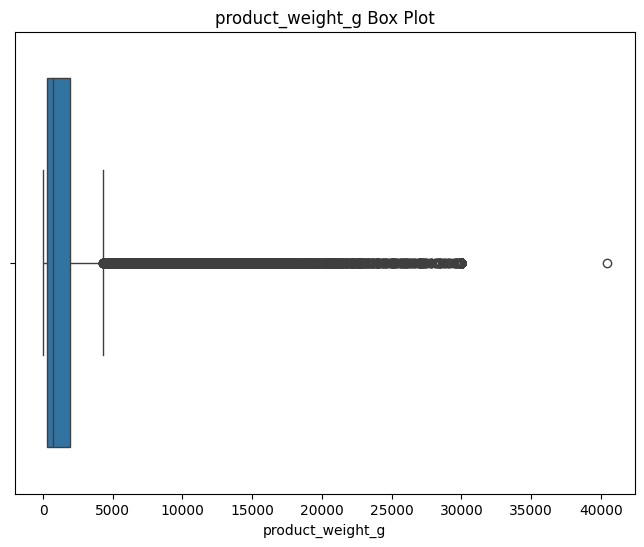

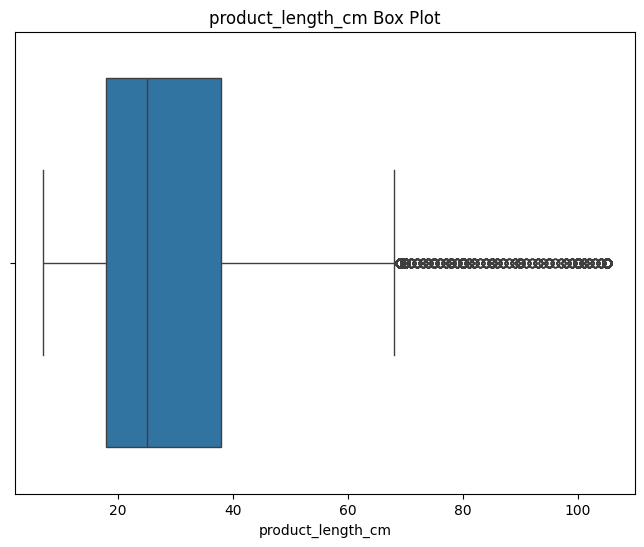

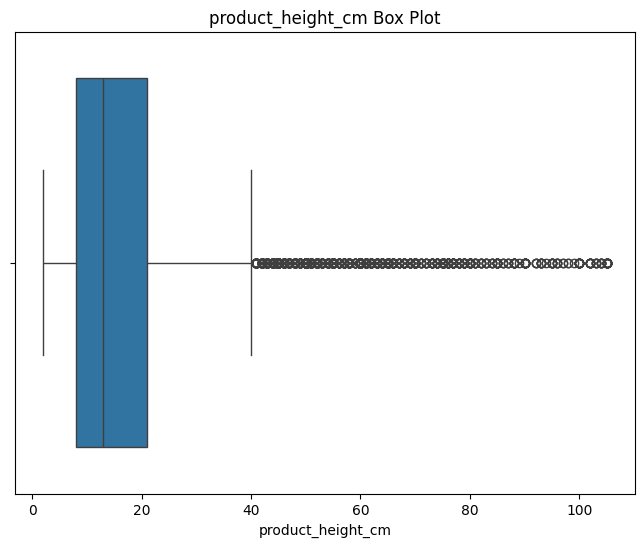

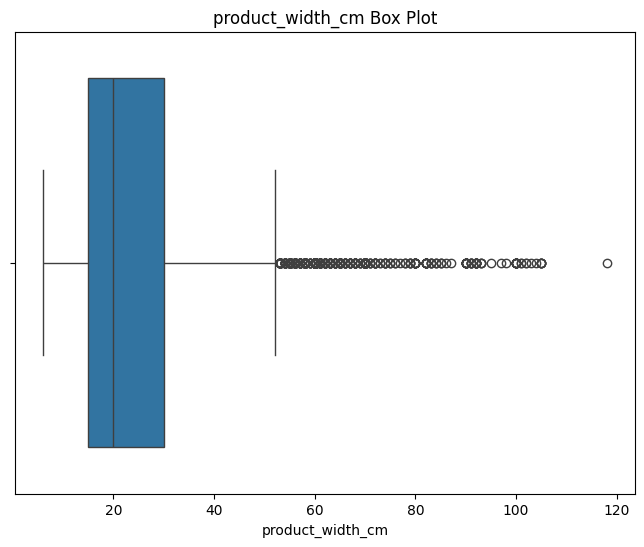

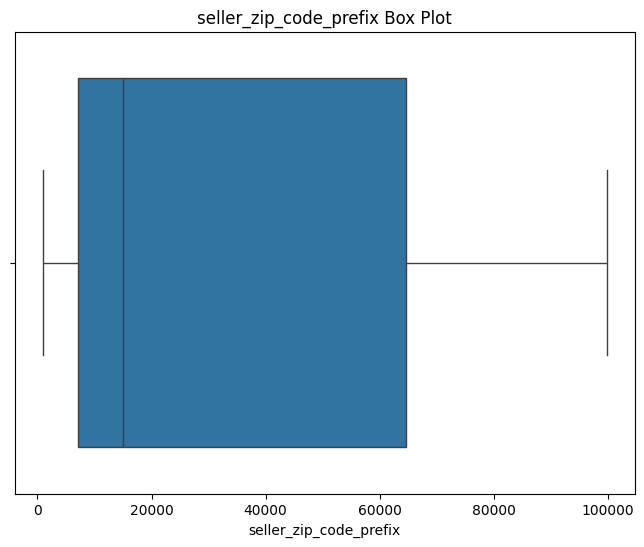

In [40]:
for df in df_list:
    plot_numerical_boxplots(df)

In [26]:
'''
# Loop through the dictionary of DataFrames
for key, df in df_dict.items():
    # Check if the DataFrame is empty
    if df.empty:
        print(f"{key} is empty, skipping...")
        continue
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Check if the numeric DataFrame is empty
    if numeric_df.empty:
        print(f"{key} does not have numeric columns, skipping...")
        continue
    
    # Optionally drop rows with missing values
    numeric_df = numeric_df.dropna()
    
    # Check if the DataFrame has rows after dropping NaNs
    if numeric_df.empty:
        print(f"{key} does not have enough data after dropping NaN values, skipping...")
        continue
    
    # Plot the pairplot
    print(f"Plotting {key}...")
    sns.pairplot(numeric_df)
    
    # Save the plot to the specified directory
    plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{key}_pairplot.png", dpi=300)
    
    # Show the plot
    plt.show()
    '''

'\n# Loop through the dictionary of DataFrames\nfor key, df in df_dict.items():\n    # Check if the DataFrame is empty\n    if df.empty:\n        print(f"{key} is empty, skipping...")\n        continue\n    \n    # Select only numeric columns\n    numeric_df = df.select_dtypes(include=[\'number\'])\n    \n    # Check if the numeric DataFrame is empty\n    if numeric_df.empty:\n        print(f"{key} does not have numeric columns, skipping...")\n        continue\n    \n    # Optionally drop rows with missing values\n    numeric_df = numeric_df.dropna()\n    \n    # Check if the DataFrame has rows after dropping NaNs\n    if numeric_df.empty:\n        print(f"{key} does not have enough data after dropping NaN values, skipping...")\n        continue\n    \n    # Plot the pairplot\n    print(f"Plotting {key}...")\n    sns.pairplot(numeric_df)\n    \n    # Save the plot to the specified directory\n    plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{key}_pair

In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
